<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/src/(FAN)%20Save%20Image%20With%20Label%20as%20NPZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

In [0]:
# Mount google drive

# from google.colab import drive
# drive.mount('/content/gdrive')
# os.listdir('gdrive/My Drive/Colab')

dataPath = '''D:/0_Joowhan's Paper/Real Data/Split Data'''
dataFolderList = os.listdir(dataPath)

D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy is not a file
D:/0_Joowhan's Paper/Real Data/Split Data/1Mass: 20
0, 0
0, 100
0, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
1, 0
1, 100
1, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
2, 0
2, 100
2, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
3, 0
3, 100
3, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
4, 0
4, 100
4, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
5, 0
5, 100
5, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
6, 0
6, 100
6, 200
Build D:/0_Joowhan's Paper/Real Data/Split Data/1Mass/1Mass_Image_With_Label.npy
Shape (240, 2)
7, 0
7, 100
7, 200
Build D:/0_Joowhan's Paper/Real Dat

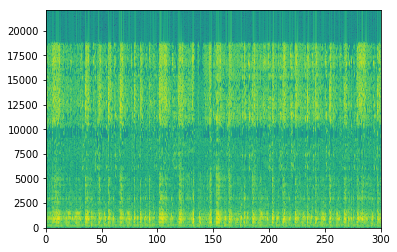

In [52]:
nsc = int(1470/3)
nov = int(nsc/2)
nff = nsc 
imgSize = 224

dataPath = '''D:/0_Joowhan's Paper/Real Data/Split Data'''
dataFolderList = os.listdir(dataPath)
dataFolderList = dataFolderList[0:-1]
dataFolderList = sorted(dataFolderList)
pathFolders = [dataPath + '/' + folder for folder in dataFolderList]
pathFolders = sorted(pathFolders)

for i in range(0, len(pathFolders)):

    imgNpyWithLabel = pathFolders[i] + '/' + dataFolderList[i] + '_Image_With_Label.npy'
        
    if os.path.isfile(imgNpyWithLabel):
        try:
            data = np.load(imgNpyWithLabel)    
            print('Loaded {} Shape: {}'.format(imgNpyWithLabel, data.shape))
            
            dataFiles = glob.glob(pathFolders[i] + '/*.wav')
            
            for j in range(len(dataFiles)):
                os.remove(dataFiles[j])
            
        except:
            print('Error while loading {}'.format(imgNpyWithLabel))
            os.remove(imgNpyWithLabel)
            print('Removed erroneous file: {}'.format(imgNpyWithLabel))
    else:
        print('{} is not a file'.format(imgNpyWithLabel))
        
        dataFiles = glob.glob(pathFolders[i] + '/*.wav')
        dataFiles = sorted(dataFiles)

        print("{}: {}".format(pathFolders[i], len(dataFiles)))

        for j in range(len(dataFiles)):
            
            imgNpyWithLabelP = pathFolders[i] + '/' + dataFolderList[i] + '_Image_With_Label' + '_' + str(j) + '.npy'
            
            labels = list()
            
            fs, dataInt16 = wf.read(dataFiles[j])
            dataFloat = dataInt16 / (2 ** 15)
            
            Pxx, _, _, _ = plt.specgram(dataFloat[:, 0], NFFT=nff, Fs=fs, noverlap=nov, \
                               window=np.hamming(nsc), cmap='viridis')
            
            imgLog = 10 * np.log10(Pxx[0:imgSize, :])
            
            specLen = np.int(imgLog.shape[1] / imgSize)
                
            imgs = np.zeros([specLen - 1, imgSize, imgSize])
            
            for k in range(0, specLen - 1):

                imgs[k, :, :] = imgLog[:, k * imgSize:(k + 1) * imgSize]

                fileNameWav = dataFiles[j].split('/')[-1]
                fileName = fileNameWav.replace('.wav', '')
                fileLabels = fileName.split('_')
                label = fileLabels[0]
                labels.append(label)

                if(k % 100 == 0):
                    print("{}, {}".format(j, k))

            labels = np.asarray(labels)
            imgPack = np.asarray([(imgs[ii, :, :], labels[ii]) for ii in range(specLen - 1)])
            np.save(imgNpyWithLabelP, imgPack)

            print('Build {}'.format(imgNpyWithLabel))
            print('Shape {}'.format(imgPack.shape))

            del imgPack
            